# Exploratory Data Analysis

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/reviews_authors_genres.csv', usecols = ['review_text', 'rating', 'sentiment', 'language_code'])
df.head()

,review_text,rating,sentiment,language_code
0,So the low rating on this one is primarily bec...,2,bad,NaN
1,Find all of my reviews at: http://52bookminimu...,2,bad,NaN
2,Meh. Not for me. I don't really like historica...,1,bad,NaN
3,This series progressively got worse with each ...,1,bad,NaN
4,"llG@ jyd@, ltshbyht m`br@, lqS@ mtkrr@, w lbd ...",1,bad,NaN


In [3]:
df.shape

(750000, 4)

In [4]:
language = ['eng', 'en-CA', 'en-GB', 'en-US']

df = df[df['language_code'].isin(language)]
#df.head()
len(df)

114566

In [5]:
options = ['good', 'bad']

df = df[df['sentiment'].isin(options)]
len(df)

76860

In [6]:
df.shape

(76860, 4)

In [39]:
#taking a look at some summary statistics of the data.
df.describe()

,rating
count,76860.000000
mean,2.943586
std,1.748560
min,0.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [8]:
#checking to see how many unique values are in each column.
df.nunique()

review_text      75180
rating               5
sentiment            2
language_code        4
dtype: int64

In [9]:
#Checking to see how many null values are in the dataframe.
df.isnull().sum()

review_text      44
rating            0
sentiment         0
language_code     0
dtype: int64

<AxesSubplot:xlabel='review_text', ylabel='Count'>

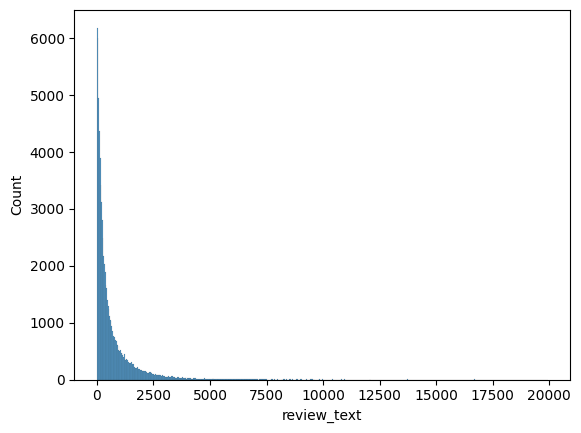

In [10]:
#look at the length of strings in the 'review_text' column.
sns.histplot(data = df, x = df['review_text'].str.len())

In [11]:
df_reviews = df.copy()

In [12]:
#drop na's from the dataframe.
df_reviews.dropna(inplace=True)

#check to see if all null values were removed.
df_reviews.isnull().sum()

review_text      0
rating           0
sentiment        0
language_code    0
dtype: int64

In [13]:
len(df_reviews)

76816

In [14]:
#check dtypes in the dataframe.
df_reviews.dtypes

review_text      object
rating            int64
sentiment        object
language_code    object
dtype: object

In [15]:
#Take a look at the first review to see what it looks like.
df_reviews['review_text'].unique()[0]

"This has got to be the most ridiculous book I have ever read. Mostly for the plethora of basic historical mistakes that could have been checked with a 5 minutes google search. \n Ms McCray has the citizens of Republican Rome (BCE) eating tomatoes and potatoes and knowing about chocolate (these items didn't arrive in Europe until the late 16th century) and pasta (it didn't arrive in Italy until Marco Polo returned from China in the late 13th century). \n Also, Ms. McCray obviously has no idea about the naming protocol in Rome. Julius wasn't Caesar's first name it was his last name and his daughter was Julia, not his wife. \n And why did she feel the need to rename Brutus's wife and mother. They were hardly unknown. His wife was Porcia Catonis and his mother the famous Servillia. \n I would not recommend this book to anyone and would give it -5 stars if I could."

In [16]:
#A contractions dictionary from Wikipedia found on Stack Overflow for expanding contractions: 
#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions_dict = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [17]:
import re

#This code is code to expand contractions in text created by Abhishek Sharma:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

#Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

#Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df_reviews['review_text']=df_reviews['review_text'].apply(lambda x:expand_contractions(x))

In [18]:
#make all reviews lowercase.
df_reviews['review_text'] = df_reviews['review_text'].apply(lambda x: x.lower())

In [19]:
#check text after expanding contractions and lowercasing all words.
df_reviews['review_text'].unique()[0]

"this has got to be the most ridiculous book i have ever read. mostly for the plethora of basic historical mistakes that could have been checked with a 5 minutes google search. \n ms mccray has the citizens of republican rome (bce) eating tomatoes and potatoes and knowing about chocolate (these items did not arrive in europe until the late 16th century) and pasta (it did not arrive in italy until marco polo returned from china in the late 13th century). \n also, ms. mccray obviously has no idea about the naming protocol in rome. julius was not caesar's first name it was his last name and his daughter was julia, not his wife. \n and why did she feel the need to rename brutus's wife and mother. they were hardly unknown. his wife was porcia catonis and his mother the famous servillia. \n i would not recommend this book to anyone and would give it -5 stars if i could."

In [20]:
#removing digits and words that contain digits because the numbers don't have much weight importance.
df_reviews['review_text']=df_reviews['review_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [21]:
import string

#This code is code to expand contractions in text created by Abhishek Sharma:
#https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
df_reviews['review_text']=df_reviews['review_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#removing all newline '\n' characters
df_reviews = df_reviews.replace(r'\n',' ', regex=True) 

#removing all excess space.
df_reviews['review_text']=df_reviews['review_text'].apply(lambda x: re.sub('\s+',' ',x))


#Let's take another look at the text.
df_reviews['review_text'].unique()[0]

'this has got to be the most ridiculous book i have ever read mostly for the plethora of basic historical mistakes that could have been checked with a minutes google search ms mccray has the citizens of republican rome bce eating tomatoes and potatoes and knowing about chocolate these items did not arrive in europe until the late century and pasta it did not arrive in italy until marco polo returned from china in the late century also ms mccray obviously has no idea about the naming protocol in rome julius was not caesars first name it was his last name and his daughter was julia not his wife and why did she feel the need to rename brutuss wife and mother they were hardly unknown his wife was porcia catonis and his mother the famous servillia i would not recommend this book to anyone and would give it stars if i could'

In [22]:
#importing nltk and downloading packages for stopwords, lemmatizing, and word tokenizing
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [23]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [24]:
#create stopwords and lemmatizer.
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [25]:
#function to tokenize words and remove stopwords.
def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence)  
    clean_tokens = [w for w in word_tokens if not w in stop_words]  
    
    return clean_tokens

In [26]:
df_reviews['review_text'] = df_reviews['review_text'].apply(remove_stopwords)
df_reviews['review_text'].head()

12    [got, ridiculous, book, ever, read, mostly, pl...
21    [cal, lust, demon, around, long, time, seen, g...
23                                        [great, book]
25     [didnt, grab, attention, may, pick, back, later]
34    [liked, writingstyle, first, part, book, chang...
Name: review_text, dtype: object

In [27]:
#function to lemmatize words.
def lemmatize_words(s):
    s = [lemmatizer.lemmatize(word) for word in s]
    return s

In [28]:
df_reviews['review_text'] = df_reviews['review_text'].apply(lemmatize_words)

#setting pd.set_option to display all text in the 'review_text' column.
pd.set_option("display.max_colwidth", None)
df_reviews['review_text'].head(1)

12    [got, ridiculous, book, ever, read, mostly, plethora, basic, historical, mistake, could, checked, minute, google, search, m, mccray, citizen, republican, rome, bce, eating, tomato, potato, knowing, chocolate, item, arrive, europe, late, century, pasta, arrive, italy, marco, polo, returned, china, late, century, also, m, mccray, obviously, idea, naming, protocol, rome, julius, caesar, first, name, last, name, daughter, julia, wife, feel, need, rename, brutus, wife, mother, hardly, unknown, wife, porcia, catonis, mother, famous, servillia, would, recommend, book, anyone, would, give, star, could]
Name: review_text, dtype: object

<AxesSubplot:>

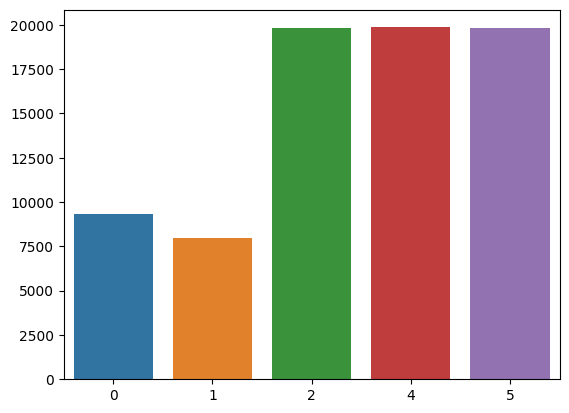

In [29]:
rate_cnt = df_reviews['rating'].value_counts()
rate_cnt = rate_cnt.sort_index()

x=rate_cnt.index
y=rate_cnt.values

sns.barplot(x=x,y=y)

In [30]:
from collections import Counter

#counting how many times a word shows up in all reviews in the dataframe
text_list = df_reviews['review_text'].to_list()
text_count = Counter(count for sublist in text_list for count in sublist)

<BarContainer object of 10 artists>

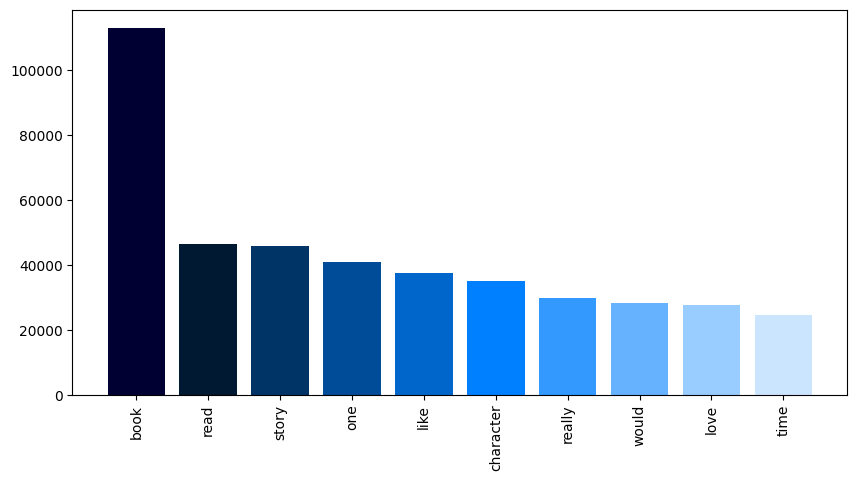

In [31]:
#sorting the dictionary to find the most common words
sorted_dict = sorted(text_count.items(), key = lambda kv: kv[1], reverse = True)
words, values = zip(*sorted_dict)

colors = ['#000033', '#001933', '#003366', '#004C99', '#0066CC', '#0080FF', '#3399FF', '#66B2FF', '#99CCFF', '#CCE5FF']
x = words[:10]
y = values[:10]

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
display(plt.bar(x, y, color = colors))

In [32]:
#parts of speech tagging
from nltk.tag import pos_tag, pos_tag_sents

text_list = df_reviews['review_text'].to_list()
tagged_list = pos_tag_sents(text_list)
tag_count = Counter(tag for sublist in tagged_list for word,tag in sublist)

print(tag_count)

Counter({'NN': 1867684, 'JJ': 902400, 'RB': 394465, 'VBD': 221425, 'VBG': 220102, 'VBP': 165249, 'VB': 162510, 'VBN': 134159, 'IN': 110753, 'NNS': 89903, 'MD': 65865, 'CD': 61814, 'VBZ': 35951, 'FW': 20105, 'JJS': 18198, 'JJR': 15760, 'DT': 15545, 'RBR': 10641, 'RP': 4781, 'CC': 4579, 'PRP': 3736, 'NNP': 3591, 'UH': 1350, 'WDT': 1318, 'WP$': 1073, 'TO': 1028, 'RBS': 907, 'EX': 854, 'WP': 823, 'WRB': 703, 'PRP$': 211, 'PDT': 21, 'SYM': 12, 'POS': 12, 'NNPS': 7, "''": 5, '``': 2, '$': 2})


<AxesSubplot:>

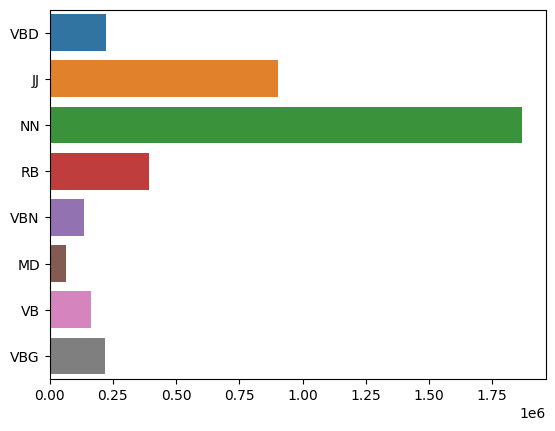

In [35]:
names = list(tag_count.keys())[:8]
values = list(tag_count.values())[:8]

sns.barplot(x = values, y = names)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d88850fe-1254-48df-812c-7b92bc9ba01d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>